<a href="https://colab.research.google.com/github/PrashilSarode1/Decision-Models/blob/main/DM_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import simpy
import random
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load the data
def load_data(file_path):
  data = pd.read_csv(file_path)
  return data
file_path="/content/drive/MyDrive/data.csv"
data=load_data(file_path)

In [8]:
data.head()

,"interarrival times ""WS1 service times"" ""WS2 service times"""
0,57.0453862261899 22.8954184877381 5.9360092430...
1,331.489290334007 20.7900514332206 6.4634926546...
2,26.4728413043979 17.0498844251232 11.173661836...
3,133.045022442826 25.6359307680148 6.4795914262...
4,24.1355626974871 21.612254433573 9.38847466724026


In [9]:
data[['interarrival_times', 'WS1_service_times', 'WS2_service_times']] = data.iloc[:, 0].str.split(expand=True)
data['interarrival_times'] = pd.to_numeric(data['interarrival_times'])
data['WS1_service_times'] = pd.to_numeric(data['WS1_service_times'])
data['WS2_service_times'] = pd.to_numeric(data['WS2_service_times'])
data.drop(data.columns[0], axis=1, inplace=True)
data

,interarrival_times,WS1_service_times,WS2_service_times
0,57.045386,22.895418,5.936009
1,331.489290,20.790051,6.463493
2,26.472841,17.049884,11.173662
3,133.045022,25.635931,6.479591
4,24.135563,21.612254,9.388475
...,...,...,...
995,53.644832,22.599359,7.529303
996,54.875513,17.192181,7.796922
997,23.327365,17.644526,3.374196
998,2.655296,23.675699,7.026867


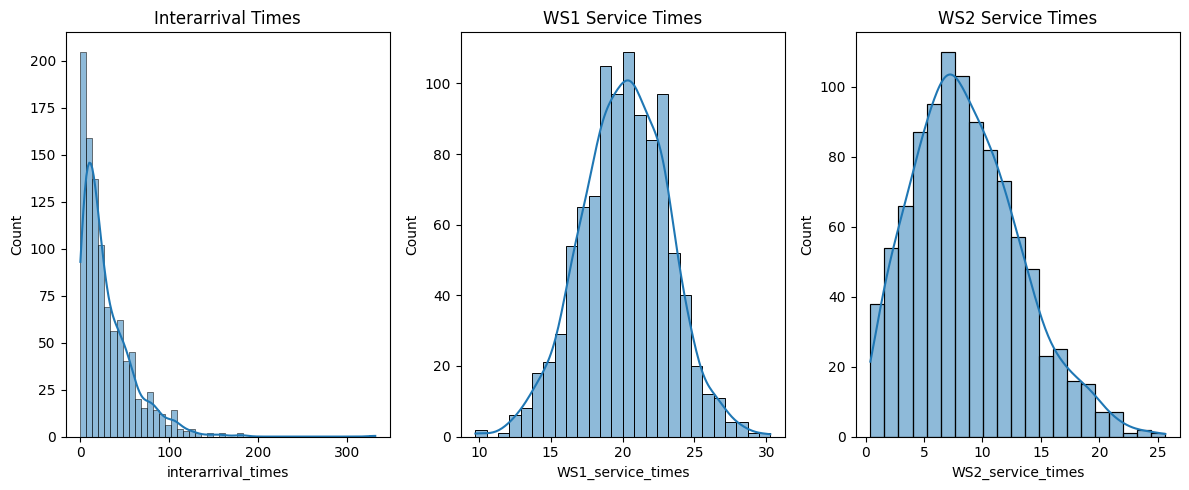

In [18]:
# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['interarrival_times'], kde=True)
plt.title('Interarrival Times')

plt.subplot(1, 3, 2)
sns.histplot(data['WS1_service_times'], kde=True)
plt.title('WS1 Service Times')

plt.subplot(1, 3, 3)
sns.histplot(data['WS2_service_times'], kde=True)
plt.title('WS2 Service Times')

plt.tight_layout()
plt.show()


In [10]:
# Parameters
p_ws2 = 0.75  # Probability of going to WS2
p_rework = 1 - p_ws2  # Probability of rework at WS1

# Simulate for each job
def simulate_job(ws1_service_time, ws2_service_time):
    visits_to_ws1 = 1
    total_ws1_time = ws1_service_time
    while np.random.rand() < p_rework:
        visits_to_ws1 += 1
        ws1_service_time /= 2  # Service time halved on rework
        total_ws1_time += ws1_service_time

    lead_time = total_ws1_time + ws2_service_time
    return visits_to_ws1, lead_time

# Number of simulations
n_simulations = 1000

# Perform the simulation for each job
simulation_results = []
for i in range(n_simulations):
    ws1_time = data['WS1_service_times'].sample().values[0]
    ws2_time = data['WS2_service_times'].sample().values[0]
    simulation_results.append(simulate_job(ws1_time, ws2_time))

# Extracting the results
visits, lead_times = zip(*simulation_results)
average_visits = np.mean(visits)
average_lead_time = np.mean(lead_times)

print(f"Average number of visits to WS1: {average_visits}")
print(f"Average lead time: {average_lead_time}")

# Part 3: Adjust capacity of WS1 (by reducing WS1 time) to halve the lead time
def adjust_ws1_capacity(factor):
    reduced_results = []
    for i in range(n_simulations):
        ws1_time = data['WS1_service_times'].sample().values[0] / factor
        ws2_time = data['WS2_service_times'].sample().values[0]
        reduced_results.append(simulate_job(ws1_time, ws2_time))

    _, reduced_lead_times = zip(*reduced_results)
    return np.mean(reduced_lead_times)

# Experiment to find the factor to halve the lead time
initial_lead_time = average_lead_time
target_lead_time = initial_lead_time / 2

factor = 1.1  # Start increasing WS1 capacity (by reducing service time)
while adjust_ws1_capacity(factor) > target_lead_time:
    factor += 0.1

print(f"Capacity adjustment factor for WS1 to halve the lead time: {factor}")


Average number of visits to WS1: 1.305
Average lead time: 31.387310122692288
Capacity adjustment factor for WS1 to halve the lead time: 3.300000000000002


In [11]:
p_ws2 = 0.75  # Probability of going to WS2
p_rework = 1 - p_ws2  # Probability of rework at WS1

def simulate_job(ws1_service_time):
    visits_to_ws1 = 1
    total_ws1_time = ws1_service_time
    while np.random.rand() < p_rework:
        visits_to_ws1 += 1
        ws1_service_time /= 2  # Service time halved on rework
        total_ws1_time += ws1_service_time

    ws2_service_time = data['WS2_service_times'].sample().values[0]
    lead_time = total_ws1_time + ws2_service_time
    return visits_to_ws1, lead_time

n_simulations = 1000
results = [simulate_job(data['WS1_service_times'].sample().values[0]) for _ in range(n_simulations)]

visits, lead_times = zip(*results)
average_visits = np.mean(visits)
average_lead_time = np.mean(lead_times)

print(f"Average number of visits to WS1: {average_visits}")
print(f"Average lead time: {average_lead_time}")

Average number of visits to WS1: 1.312
Average lead time: 31.7441851599811


In [12]:
#Increase WS1 service rate by reducing service time by half
data['WS1_service_times_reduced'] = data['WS1_service_times'] / 2

results_reduced = [simulate_job(data['WS1_service_times_reduced'].sample().values[0]) for _ in range(n_simulations)]
_, lead_times_reduced = zip(*results_reduced)
average_lead_time_reduced = np.mean(lead_times_reduced)

print(f"New average lead time with reduced WS1 capacity: {average_lead_time_reduced}")

New average lead time with reduced WS1 capacity: 19.683000098096464


In [19]:
# Parameters
p_ws2 = 0.75  # Probability of going to WS2
p_rework = 1 - p_ws2  # Probability of rework at WS1

# Statistics
total_visits_to_ws1 = 0
total_lead_time = 0
job_count = 0

# Job process in the production system
def job(env, ws1, ws2, job_id):
    global total_visits_to_ws1, total_lead_time, job_count

    # Generate service times from the dataset
    ws1_time = data['WS1_service_times'].sample().values[0]
    ws2_time = data['WS2_service_times'].sample().values[0]

    # Start at WS1
    visits_to_ws1 = 1
    total_ws1_time = ws1_time

    # Process job at WS1
    with ws1.request() as req:
        yield req
        yield env.timeout(ws1_time)  # Processing time in WS1

    # Rework loop
    while np.random.rand() < p_rework:
        visits_to_ws1 += 1
        ws1_time /= 2  # Service time halved for rework
        total_ws1_time += ws1_time

        with ws1.request() as req:
            yield req
            yield env.timeout(ws1_time)  # Processing time in WS1

    # After WS1, move to WS2
    with ws2.request() as req:
        yield req
        yield env.timeout(ws2_time)  # Processing time in WS2

    # Calculate lead time for the job
    lead_time = total_ws1_time + ws2_time

    # Update statistics
    total_visits_to_ws1 += visits_to_ws1
    total_lead_time += lead_time
    job_count += 1

# Job arrival process
def job_arrival(env, ws1, ws2):
    job_id = 0
    while True:
        interarrival_time =data['interarrival_times'].sample().values[0]
        yield env.timeout(interarrival_time)  # Wait for the next job to arrive
        env.process(job(env, ws1, ws2, job_id))
        job_id += 1

# Simulation function
def simulate(n_jobs):
    global total_visits_to_ws1, total_lead_time, job_count

    # Reset statistics
    total_visits_to_ws1 = 0
    total_lead_time = 0
    job_count = 0

    # Initialize environment
    env = simpy.Environment()

    # Define workstations (with infinite capacity)
    ws1 = simpy.Resource(env, capacity=1)
    ws2 = simpy.Resource(env, capacity=1)

    # Start the job arrival process
    env.process(job_arrival(env, ws1, ws2))

    # Run the simulation for a specific number of jobs
    env.run(until=n_jobs)

    # Compute averages
    average_visits = total_visits_to_ws1 / job_count
    average_lead_time = total_lead_time / job_count

    print(f"Average number of visits to WS1: {average_visits}")
    print(f"Average lead time: {average_lead_time}")
    return average_lead_time

# Simulate for 1000 jobs
n_jobs = 400
initial_lead_time = simulate(n_jobs)

# Part 3: Adjust capacity of WS1 (by reducing WS1 time) to halve the lead time
def adjust_ws1_capacity(factor):
  data['WS1_service_times_adjusted'] = data['WS1_service_times'] / factor
  return simulate(n_jobs)

# Find the factor that reduces the lead time by half
target_lead_time = initial_lead_time / 2
factor = 1.1  # Start with a small increase in capacity
current_lead_time = initial_lead_time

while current_lead_time > target_lead_time:
    factor += 0.1
    current_lead_time = adjust_ws1_capacity(factor)

print(f"Capacity adjustment factor for WS1 to halve the lead time: {factor}")


Average number of visits to WS1: 1.1538461538461537
Average lead time: 31.760625831607193
Average number of visits to WS1: 1.4615384615384615
Average lead time: 31.482912343357803
Average number of visits to WS1: 1.1111111111111112
Average lead time: 28.436056206590955
Average number of visits to WS1: 1.625
Average lead time: 26.740527606278
Average number of visits to WS1: 1.2
Average lead time: 29.17283764410005
Average number of visits to WS1: 1.4
Average lead time: 30.70452440699094
Average number of visits to WS1: 1.2727272727272727
Average lead time: 36.584214903878674
Average number of visits to WS1: 1.1538461538461537
Average lead time: 33.76637754706626
Average number of visits to WS1: 1.0
Average lead time: 30.04420627961519
Average number of visits to WS1: 1.25
Average lead time: 29.915130018229764
Average number of visits to WS1: 1.1428571428571428
Average lead time: 28.954396655573568
Average number of visits to WS1: 1.3076923076923077
Average lead time: 31.816491131559903

KeyboardInterrupt: 